# Quantifying shakespeare
Analyzing the frequencies of different letters in Shakespears work.

(Data from: bit.ly/shakespeare-txt)

In this notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

# Read the lines of the data

In [11]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a txt file into a list of strings for each line"""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        # strip the leading white space and trailing " a dog " -> "a dog"
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakes_lines: list[str] = read_lines("../../data/shakespeare.txt")
print(len(shakes_lines))

124456


# Counting letters

In [12]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1"""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

In [13]:
d: dict[str, int] = {}
tally(d, "a")
#d = {"a", 1}
print(d)
tally(d, "a")
#d = {"a", 2}
print(d)
print(d, "b")
#d = {"a": 2, "b", 1}
print(d)

{'a': 1}
{'a': 2}
{'a': 2} b
{'a': 2}


In [14]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequency of each letter in each line of lines."""
    counts: dict[str, int] = {}
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(counts, char)
        return counts
    
shakes_letters: dict[str, int] = count_letters(shakes_lines)
print(shakes_letters)

{'t': 8, 'h': 3, 'i': 3, 's': 3, 'e': 10, 'x': 1, 'f': 1, 'l': 1, 'p': 2, 'r': 3, 'n': 3, 'd': 2, 'b': 2, 'y': 1, 'o': 1, 'j': 1, 'c': 1, 'g': 2, 'u': 1, 'a': 1}


In [15]:
# Get a list of items of a dictionary
print(shakes_letters)
shakes_letters_list = list(shakes_letters.items())
# print(shakes_letters_list)
shakes_letters_list = sorted(shakes_letters_list)
# print(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted

{'t': 8, 'h': 3, 'i': 3, 's': 3, 'e': 10, 'x': 1, 'f': 1, 'l': 1, 'p': 2, 'r': 3, 'n': 3, 'd': 2, 'b': 2, 'y': 1, 'o': 1, 'j': 1, 'c': 1, 'g': 2, 'u': 1, 'a': 1}


{'a': 1,
 'b': 2,
 'c': 1,
 'd': 2,
 'e': 10,
 'f': 1,
 'g': 2,
 'h': 3,
 'i': 3,
 'j': 1,
 'l': 1,
 'n': 3,
 'o': 1,
 'p': 2,
 'r': 3,
 's': 3,
 't': 8,
 'u': 1,
 'x': 1,
 'y': 1}

# Visualize Data in Bar Graph

<BarContainer object of 20 artists>

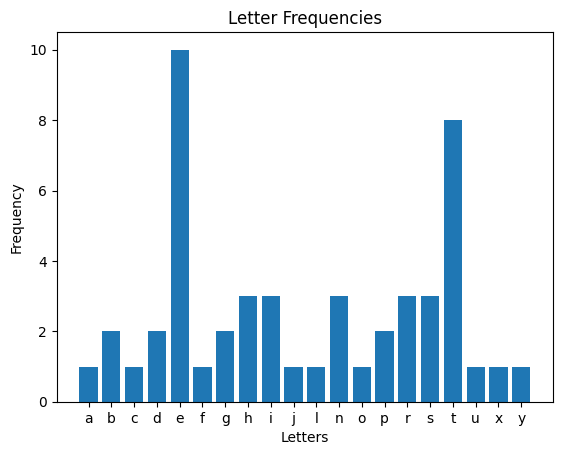

In [16]:
from matplotlib import pyplot

pyplot.title("Letter Frequencies")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
x_values: list[str] = shakes_letters_sorted.keys() # my letters
y_values: list[int] = shakes_letters_sorted.values() # my letter counts
pyplot.bar(x_values, y_values)